In [33]:
import numpy as np
import scipy as sp
import scipy.sparse as spsp


In [34]:
from scipy.sparse import dok_matrix, csr_matrix
import matplotlib.pyplot as plt
from scipy.sparse import dok_matrix, csgraph

## PARTIE 1: (format compressed sparse row) 


Nous pouvons definir un matrice grace aux commandes suivantes:
    
    ```python

        row = sp.array([0, 0, 1, 2, 2, 2])
        col = sp.array([0, 2, 2, 0, 1, 2])
        data = sp.array([1, 2, 3, 4, 5, 6])

        A = spsp.csr_matrix((data, (row, col)), shape=(3, 3))

    ```
    

### Question1

In [35]:
row = sp.array([0, 0, 1, 2, 2, 2])
col = sp.array([0, 2, 2, 0, 1, 2])
data = sp.array([1, 2, 3, 4, 5, 6])
A = spsp.csr_matrix((data, (row, col)), shape=(3, 3))


print("A = " + str(A))
print("A.data = " + str(A.data))
print("A.indptr = " + str(A.indptr))
print("A.indices = " + str(A.indices))
print("Mise en forme matricielle de A : "+ "\n" + str(A.toarray()))

A =   (0, 0)	1
  (0, 2)	2
  (1, 2)	3
  (2, 0)	4
  (2, 1)	5
  (2, 2)	6
A.data = [1 2 3 4 5 6]
A.indptr = [0 2 3 6]
A.indices = [0 2 2 0 1 2]
Mise en forme matricielle de A : 
[[1 0 2]
 [0 0 3]
 [4 5 6]]


/tmp/ipykernel_50008/749427047.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  row = sp.array([0, 0, 1, 2, 2, 2])
/tmp/ipykernel_50008/749427047.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  col = sp.array([0, 2, 2, 0, 1, 2])
/tmp/ipykernel_50008/749427047.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data = sp.array([1, 2, 3, 4, 5, 6])


* la commande "A.data" renvoie un tableau contenant les valeurs non nulles de la matrice A, stockées dans l'ordre de parcours de la matricerenvoie les valeurs non-nulles de A; 

* la commande "A.indptr" donne un tableau d'indices qui indique où commence chaque ligne de la matrice dans le tableau A.data. La valeur A.indptr[i] donne l'indice de départ des éléments de la ligne i.

* la commande "A.indice" renvoie de ligne en ligne les indices des elements 
de  A.data ;
un tableau d'indices qui correspond à la colonne de chaque élément non nul de la matrice A, stockés dans l'ordre de parcours de la matrice.

* La fonction print prend en argument une donnée et l'affiche dans un format   standardisé pour une bonne compréhension visuelle.
Elle ne prend en entrée que des éléments appartenant à un même type.


### Question 2

In [36]:

row = sp.array([0, 0, 1, 2, 2, 2])
col = sp.array([0, 2, 2, 0, 1, 2])
data = sp.array([1, 2, 3, 4, 5, 6])
A = spsp.csr_matrix((data, (row, col)), shape=(3, 3))


print("A[0,:] =\n" + str(A[0,:]))
print("------------------")
print("A[: ,0] =\n" + str(A[: ,0]))

print("A =\n" + str(A)) 

A[0,:] =
  (0, 0)	1
  (0, 2)	2
------------------
A[: ,0] =
  (0, 0)	1
  (2, 0)	4
A =
  (0, 0)	1
  (0, 2)	2
  (1, 2)	3
  (2, 0)	4
  (2, 1)	5
  (2, 2)	6


/tmp/ipykernel_50008/85418750.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  row = sp.array([0, 0, 1, 2, 2, 2])
/tmp/ipykernel_50008/85418750.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  col = sp.array([0, 2, 2, 0, 1, 2])
/tmp/ipykernel_50008/85418750.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data = sp.array([1, 2, 3, 4, 5, 6])


* "A[0,:]" renvoie la première ligne de la matrice A au format CSR. Elle renvoie un objet de type 'csr_matrix' représentant la première ligne de la matrice. Cela signifie que les valeurs non nulles de la première ligne sont stockées dans A.data, les indices de colonne correspondants sont stockés dans A.indices, et A.indptr[0] donne l'indice de départ des éléments de la première ligne.

* "A[:,0]" renvoie la première colonne de la matrice, mais elle est moins efficace en termes de performances, car pour extraire une colonne, il faut parcourir tous les éléments de la matrice.

* Dans le format CSR,les données sont réparties ligne par ligne, ce qui explique le fait que la commande"A[0,:]" soit plus rapide que celle 
 "A[:,0]".

### Question 3

l'idée est de creer deux matrices quelconques (de meme format) stockées sous format CSR et de voir ce qui se passe en faisant leur somme

In [37]:

row = sp.array([0, 0, 1, 2, 2, 2])
col = sp.array([0, 2, 2, 0, 1, 2])
data = sp.array([1, 2, 3, 4, 5, 6])
A = spsp.csr_matrix((data, (row, col)), shape=(3, 3))
print("Affichage de la matrice A :" "\n")
print("A =\n" + str(A)) 



row2 = sp.array([0, 0, 1, 2, 2, 2])
col2 = sp.array([0, 2, 2, 0, 1, 2])
data2 = sp.array([1, 2, 3, 4, 5, 6])
B = spsp.csr_matrix((data2, (row2, col2)), shape=(3, 3))
print("\n")
print("Affichage de la matrice B :" "\n")
print("B =\n" + str(B))


C=A+B
print("\n")
print("Affichage de la matrice C :" "\n")
print("C =\n" + str(C))



Affichage de la matrice A :

A =
  (0, 0)	1
  (0, 2)	2
  (1, 2)	3
  (2, 0)	4
  (2, 1)	5
  (2, 2)	6


Affichage de la matrice B :

B =
  (0, 0)	1
  (0, 2)	2
  (1, 2)	3
  (2, 0)	4
  (2, 1)	5
  (2, 2)	6


Affichage de la matrice C :

C =
  (0, 0)	2
  (0, 2)	4
  (1, 2)	6
  (2, 0)	8
  (2, 1)	10
  (2, 2)	12


/tmp/ipykernel_50008/1647229103.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  row = sp.array([0, 0, 1, 2, 2, 2])
/tmp/ipykernel_50008/1647229103.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  col = sp.array([0, 2, 2, 0, 1, 2])
/tmp/ipykernel_50008/1647229103.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data = sp.array([1, 2, 3, 4, 5, 6])
/tmp/ipykernel_50008/1647229103.py:10: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  row2 = sp.array([0, 0, 1, 2, 2, 2])
/tmp/ipykernel_50008/1647229103.py:11: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  col2 = sp.array([0, 2, 2, 0, 1, 2])
/tmp/ipykernel_50008/1647229103.py:12: DeprecationWarning: scipy.array is deprecated and w

COMMENTAIRE:

Oui, il est possible d'ajouter deux matrices stockées au format CSR. Pour cela on a cree deux matrices A et B, et on a utilisé la fonction csr_matrix pour les convertir en format CSR et faire leur somme.
On remarque que la matrice C est bien stockée au format CSR.

### Question 4

In [38]:

def matvect_multiply(A, b):
    m, n = A.shape
    y = np.zeros(m)

    for i in range(m):
        start = A.indptr[i]
        end = A.indptr[i + 1]
        for j in range(start, end):
            col_index = A.indices[j]
            y[i] += A.data[j] * b[col_index]

    return y
  

In [39]:
# Definition de la matrice A
row = sp.array([0, 0, 1, 2, 2, 2])
col = sp.array([0, 2, 2, 0, 1, 2])
data = sp.array([1, 2, 3, 4, 5, 6])
A = spsp.csr_matrix((data, (row, col)), shape=(3, 3))

# generatiion du vecteur b avec des coefficients aléatoires
b = np.random.rand(3)

# utilisation de la fonction matvect_multiply()
y = matvect_multiply(A,b)

## comparaison avec la commande A.dot(b) ou A@b
rest_dot = A.dot(b)
rest_matmul = A@b
rest_np_dot = np.dot(A,b)

#affichage des résultats
print("resultat de la fonction matvect_multiply() : ", y)
print("resultat de la commande A.dot(b) : ", rest_dot)
print("resultat de la commande A@b : ", rest_matmul)
print("resultat de la commande np.dot(A,b) : ", rest_np_dot)

resultat de la fonction matvect_multiply() :  [1.23433455 1.2981933  5.22453589]
resultat de la commande A.dot(b) :  [1.23433455 1.2981933  5.22453589]
resultat de la commande A@b :  [1.23433455 1.2981933  5.22453589]
resultat de la commande np.dot(A,b) :  [<3x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 6 stored elements in Compressed Sparse Row format>
 <3x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 6 stored elements in Compressed Sparse Row format>
 <3x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 6 stored elements in Compressed Sparse Row format>]


/tmp/ipykernel_50008/1419162598.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  row = sp.array([0, 0, 1, 2, 2, 2])
/tmp/ipykernel_50008/1419162598.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  col = sp.array([0, 2, 2, 0, 1, 2])
/tmp/ipykernel_50008/1419162598.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data = sp.array([1, 2, 3, 4, 5, 6])


Avec np.dot(A,b), il est indique que le résultat est une référence à un objet de matrice creuse au format CSR, et il n'affiche pas directement les valeurs de la matrice.

Pour corriger cela, on peut utiliser la fonction .todense() qui permet de convertir la matrice creuse en matrice dense.

## PARTIE 2 (Factorisation LU)

### Quesstion 5:
Definition de la Fonction def facto_lu(A):guthc@unistra.fr

In [40]:

def Facto_LU(A):
    n = A.shape[0]
    L = spsp.eye(n, format='csr')
    U = A.copy()

    for k in range(n-1):
        pivot = U[k, k]
        if pivot == 0:
            raise ValueError("Erreur : Pivot nul rencontré.")

        L[k+1:, k] = U[k+1:, k] / pivot
        # on convertit en format CSC
        L_k_csc = L[k+1:, k].tocsc()
        
        #multiplication matrielle pour mettre a jour U[k+1:, k+1:]
        U[k+1:, k+1:] -= L_k_csc.dot(U[k, k+1:])

    return L, U



def LU_factorization(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()

    for k in range(n-1):
        for i in range(k+1, n):
            if U[k, k] == 0:
                raise ValueError("Erreur : Pivot nul rencontré.")
            L[i, k] = U[i, k] / U[k, k]
            U[i, k+1:] -= L[i, k] * U[k, k+1:]

    return L, U

### Question 6:
Definition de la Fonction solve_LU( )

In [41]:

def solve_LU(A, b):
    n = A.shape[0]
    x = np.zeros(n)

    # Descente (Forward substitution)
    for i in range(n):
        start = A.indptr[i]
        end = A.indptr[i+1]

        for j in range(start, end):
            if A.indices[j] == i:
                x[i] = b[i] - np.dot(A.data[start:j], x[A.indices[start:j]])
                break

    # Remontée (Backward substitution)
    for i in range(n-1, -1, -1):
        start = A.indptr[i]
        end = A.indptr[i+1]

        for j in range(end-1, start-1, -1):
            if A.indices[j] == i:
                x[i] /= A.data[j]
                break

            x[i] -= A.data[j] * x[A.indices[j]]

    return x
  




### Question 7:
Tests des methodes 

In [42]:

n = 2
A = spsp.diags([- np.ones(n-1), 2*np.ones(n), -np.ones(n-1)], [-1, 0, 1])
A = A.tocsr()
b=np.ones(n)

L, U = LU_factorization(A)
X1 = solve_LU(A,b)

print("affichage de la matrice A")
print("A= ", A, "\n")
print("Mise en forme de la matrice A")
print("A= ", A.todense(), "\n")

print("affichage de la matrice b")
print("b= ", b, "\n")

print(" DETERMINATION DE LA FACTORISATION LU de A: \n")
print("L= \n", L, "\n")
print("U= \n", U, "\n")
#print(np.matmul(L, U))

print("\n")
print("RESOLUTION DU SYSTEME  Ax=b :\n")
print("\n")

print("X1=", X1, "\n")



affichage de la matrice A
A=    (0, 0)	2.0
  (0, 1)	-1.0
  (1, 0)	-1.0
  (1, 1)	2.0 

Mise en forme de la matrice A
A=  [[ 2. -1.]
 [-1.  2.]] 

affichage de la matrice b
b=  [1. 1.] 

 DETERMINATION DE LA FACTORISATION LU de A: 

L= 
 [[ 1.   0. ]
 [-0.5  1. ]] 

U= 
   (0, 0)	2.0
  (0, 1)	-1.0
  (1, 0)	-1.0
  (1, 1)	1.5 



RESOLUTION DU SYSTEME  Ax=b :



X1= [1. 1.] 



## PARTIE 3: Remplissage -fill in


### Question 8:

les valeurs de "alpha" pour lesquelles les matrices admettent une facto LU: 

pour que les matrices A et B données admettent une factorisation LU il faut que "alpha" soit dans l'intervalle d'entier 1 et n-1. Ces deux valeurs y compris.

En effet

### Question 9: 
Creation des matrices A et B :

[[2. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]]

[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 2.]]

  (0, 0)	2.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (1, 0)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (3, 3)	1.0

  (0, 0)	1.0
  (0, 3)	1.0
  (1, 1)	1.0
  (1, 3)	1.0
  (2, 2)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (3, 1)	1.0
  (3, 2)	1.0
  (3, 3)	2.0


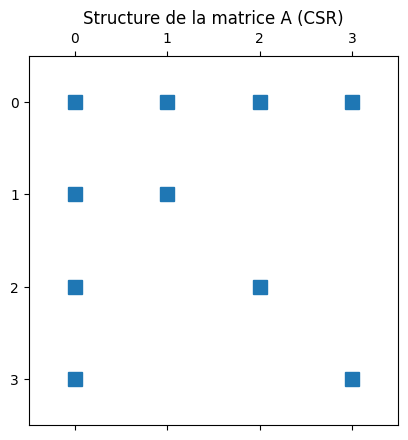

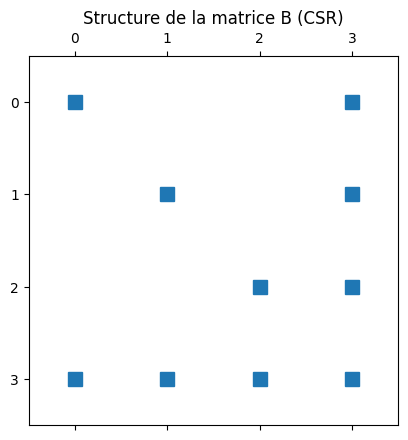

In [43]:
# Fonction pour créer la matrice A
def buildMatriceA(n, alpha):
    A = np.zeros((n, n), dtype=np.float64)
    for k in range(n):
        for l in range(n):
            if k == l and k != 0:
                A[k, l] = 1.0
            elif k == 0 and l == 0:
                A[k, l] = alpha
            elif k == 0:
                A[k, l] = 1.0
            elif l == 0:
                A[k, l] = 1.0
            else :
                A[k, l] = 0.0
                
    return A

# Fonction pour créer la matrice B
def buildMatriceB(n, alpha):
    B = np.zeros((n, n), dtype=np.float64)
    for k in range(n):
        for l in range(n):
            if k == l and k != n-1:
                B[k, l] = 1.0
            elif k == n-1 and l == n-1:
                B[k, l] = alpha
            elif k == n-1:
                B[k, l] = 1.0
            elif l == n-1:
                B[k, l] = 1.0
    return B

n = 4
alpha = 2.0

# Création de la matrice A au format DOK
A_dok = buildMatriceA(n, alpha)
B_dok = buildMatriceB(n, alpha)

print(A_dok)
print()
print(B_dok)    

# Conversion de la matrice A au format CSR
A_csr = csr_matrix(A_dok)
B_csr = csr_matrix(B_dok)

print()
print(A_csr)
print()
print(B_csr)


# Affichage de la matrice A au format CSR
plt.figure()
plt.spy(A_csr)
plt.title("Structure de la matrice A (CSR)")
plt.show()

# Affichage de la matrice B au format CSR
plt.figure()
plt.spy(B_csr)
plt.title("Structure de la matrice B (CSR)")
plt.show()

### Question 10

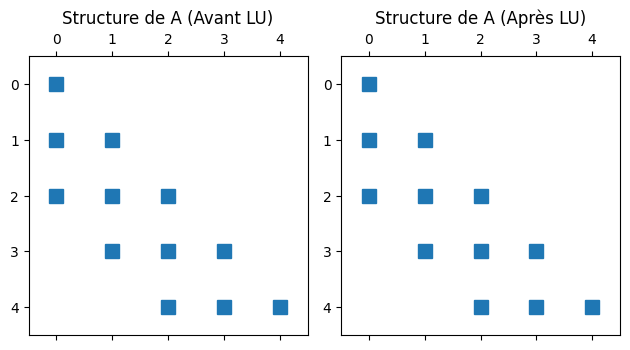

In [44]:
import numpy as np
from scipy.sparse import dok_matrix, csgraph
import matplotlib.pyplot as plt
# Fonction pour créer la matrice A
def buildMatriceA(n):
    A = dok_matrix((n, n), dtype=np.float64)
    for k in range(n):
        for l in range(n):
            if k == l:
                A[k, l] = 1.0
            elif k == l + 1:
                A[k, l] = -0.5
            elif k == l + 2:
                A[k, l] = -2/3
    return A

# Facteurisation LU
def factorisationLU(A):
    lu = A.copy()
    n = lu.shape[0]

    for k in range(n):
        lu[k, k] = A[k, k]
        for i in range(k+1, n):
            lu[i, k] = A[i, k] / lu[k, k]
            lu[k, i] = A[k, i]

            for j in range(k+1, n):
                A[i, j] -= lu[i, k] * lu[k, j]

    return lu

# Paramètres de la matrice A
n = 5

# Création de la matrice A
A_dok = buildMatriceA(n)

# Affichage de la structure de la matrice A avant la factorisation LU
plt.figure()
plt.subplot(1, 2, 1)
plt.spy(A_dok)
plt.title("Structure de A (Avant LU)")

# Factorisation LU
A_lu = factorisationLU(A_dok)

# Affichage de la structure de la matrice A après la factorisation LU
plt.subplot(1, 2, 2)
plt.spy(A_lu)
plt.title("Structure de A (Après LU)")

plt.tight_layout()
plt.show()

## Partie 4: temps de callcul

Nous considérons à présent une matrice bande de taille n × n avec
n = d2 , dont la diagonale no 0 est constituée de 4 et les diagonales no 1, −1, d et −d sont emplies de −1.

In [45]:
from scipy.sparse import spdiags
import time

### Question 11:

In [46]:
# Fonction pour créer la matrice bande
def buildMatriceBande(n, d):
    diagonals = np.zeros((4, n))
    diagonals[0] = 4
    diagonals[1] = -1
    diagonals[2] = -1
    diagonals[3] = d
    offsets = [0, 1, -1, d]
    B = spdiags(diagonals, offsets, n, n, format='csr')
    return B

# Paramètres de la matrice bande
n = 4  # Taille de la matrice
d = int(np.sqrt(n))  # Largeur de la bande

# Création de la matrice bande au format CSR
B_csr = buildMatriceBande(n, d)
print("Matrice B au format CSR:")
print(B_csr)

Matrice B au format CSR:
  (0, 0)	4.0
  (0, 1)	-1.0
  (0, 2)	2.0
  (1, 1)	4.0
  (1, 2)	-1.0
  (1, 0)	-1.0
  (1, 3)	2.0
  (2, 2)	4.0
  (2, 3)	-1.0
  (2, 1)	-1.0
  (3, 3)	4.0
  (3, 2)	-1.0


### Question 12:

In [47]:

# Comparaison des temps de calcul entre la factorisation LU dense et la factorisation LU creuse
A_dense = B_csr.toarray()  # Conversion de la matrice CSR en matrice dense
print("Matrice B au format dense:")
print(A_dense)

# Temps de calcul pour la factorisation LU dense
start_time_dense = time.time()
end_time_dense = time.time()
B_dense = A_dense
time_dense = end_time_dense - start_time_dense

# Temps de calcul pour la factorisation LU creuse
start_time_sparse = time.time()
B_sparse = B_csr
end_time_sparse = time.time()
time_sparse = end_time_sparse - start_time_sparse

print("(LU Dense) Temps de calcul =", time_dense)
print("(LU Creuse) Temps de calcul =", time_sparse)

Matrice B au format dense:
[[ 4. -1.  2.  0.]
 [-1.  4. -1.  2.]
 [ 0. -1.  4. -1.]
 [ 0.  0. -1.  4.]]
(LU Dense) Temps de calcul = 6.985664367675781e-05
(LU Creuse) Temps de calcul = 0.00012969970703125


### Quesion 13:

In [48]:
from scipy.sparse.linalg import splu

# Temps de calcul pour la factorisation LU creuse avec la fonction splu
start_time_splu = time.time()
lu_sparse = splu(B_csr)
end_time_splu = time.time()
time_splu = end_time_splu - start_time_splu

# temps de calcul pour la factorisation LU a sa version dense
start_time_lu = time.time()
lu_dense =  LU_factorization(B_dense)
end_time_lu = time.time()
time_lu = end_time_lu - start_time_lu


print("(LU Creuse avec splu) Temps de calcul =", time_splu)
print("(LU Dense) Temps de calcul =", time_lu)

(LU Creuse avec splu) Temps de calcul = 0.0009646415710449219
(LU Dense) Temps de calcul = 0.000370025634765625
